<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r7-i2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r7/2-fft-malicious-n-0-15-m-1-r7.csv?token=AKVFSOC7MJD3WGMWIHHSWAS63I3MM')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r7/2-fft-malicious-n-0-15-m-11-r7.csv?token=AKVFSOAXOHNH6CKQ6IUNANS63I3MQ')

df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r7/2-fft-malicious-n-0-4-m-1-r7.csv?token=AKVFSOCBQ42LVRP6PGJAULC63I3MS')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r7/2-fft-malicious-n-0-4-m-11-r7.csv?token=AKVFSODMBDTFT4UMHT4UIHC63I3MU')

df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r7/2-fft-malicious-n-0-6-m-1-r7.csv?token=AKVFSOBV3E2W7HNI7B6DL2S63I3MW')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r7/2-fft-malicious-n-0-6-m-11-r7.csv?token=AKVFSOCQAEIWTKLA6VPURKK63I3MY')

df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r7/2-fft-malicious-n-0-9-m-1-r7.csv?token=AKVFSOGULUVMDVZPEO5GZA263I3M4')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r7/2-fft-malicious-n-0-9-m-11-r7.csv?token=AKVFSOD37M3N2DR3H456SF263I3M6')

df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r7/2-fft-normal-n-0-15-r7.csv?token=AKVFSOE2CCVLCBMQWXIXNZ263I3NA')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r7/2-fft-normal-n-0-4-r7.csv?token=AKVFSOG2XD3CCBNYD7IOAD263I3NC')
df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r7/2-fft-normal-n-0-6-r7.csv?token=AKVFSOAI6ECUOHX4PEWE23S63I3NG')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r7/2-fft-normal-n-0-9-r7.csv?token=AKVFSOGUIRCGS7N2GRHHJVC63I3NI')

In [13]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df11.shape)
print(df12.shape)

(67719, 26)
(77712, 26)
(60848, 26)
(70778, 26)
(60848, 26)
(70908, 26)
(56931, 26)
(66931, 26)
(48449, 26)
(41369, 26)
(41489, 26)
(37680, 26)


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df5, ignore_index=True,sort=False)
df = df.append(df6, ignore_index=True,sort=False)
df = df.append(df7, ignore_index=True,sort=False)
df = df.append(df8, ignore_index=True,sort=False)
df = df.append(df9, ignore_index=True,sort=False)
df = df.append(df10, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)

df = df.sort_values('timestamp')
df.to_csv('fft-r7-train.csv',index=False)

In [15]:
df = pd.read_csv('fft-r7-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,11,0,1,1,1,4,3,9,11,11,23,7,3,1,1,1.0,8,108,1,108,108,0,12,3,27,0
1,11,0,4,1,1,4,3,9,6,6,23,7,3,1,1,1.0,8,99,1,99,99,0,12,3,27,0
2,11,0,4,1,1,4,3,9,6,6,23,7,2,1,1,1.0,8,108,1,108,108,0,8,3,27,0
3,11,0,1,1,1,4,3,9,11,11,23,7,2,1,1,1.0,8,117,1,117,117,0,8,3,27,0
4,11,0,1,1,1,4,3,9,11,11,23,7,3,1,1,1.0,8,107,1,107,107,0,12,3,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701657,3276767,1,0,4,1,1,5,19,23,7,15,15,30094,2,0,0.0,5,5,38,42,190,0,120376,20,380,0
701658,3276768,1,0,4,2,2,5,19,23,7,15,15,30094,2,0,0.0,6,4,39,42,156,0,481504,20,380,0
701659,3276769,1,0,4,3,2,5,19,23,7,15,15,30094,2,0,0.0,7,3,40,42,120,0,722256,20,380,0
701660,3276770,1,0,4,4,2,5,19,23,7,15,15,30094,2,0,0.0,8,2,41,42,82,0,963008,20,380,0


In [16]:
df.shape

(701662, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r7/2-fft-malicious-n-0-15-m-12-r7.csv?token=AKVFSOGQXPD3OXG6OLC3P6S63I3WS')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r7/2-fft-malicious-n-0-15-m-7-r7.csv?token=AKVFSOHR6N2LIBQVGJQFB4C63I3WY')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r7/2-fft-malicious-n-0-4-m-12-r7.csv?token=AKVFSOEDU7BXD7GKX4UU72S63I3W2')
df16 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r7/2-fft-malicious-n-0-4-m-7-r7.csv?token=AKVFSOE7XL3J5FV7HGA2BEK63I3W6')
df17 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r7/2-fft-malicious-n-0-6-m-12-r7.csv?token=AKVFSOHWECATKM5SYEW7UZC63I3XA')
df18 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r7/2-fft-malicious-n-0-6-m-7-r7.csv?token=AKVFSOCL3PM36USSPSSFMCC63I3XE')
df19 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r7/2-fft-malicious-n-0-9-m-12-r7.csv?token=AKVFSOFWEXNUVFI35HG3ZEC63I3XG')
df20 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r7/2-fft-malicious-n-0-9-m-7-r7.csv?token=AKVFSOBYJTCSRAIQSXHCYLK63I3XK')

In [18]:
print(df13.shape)
print(df14.shape)
print(df15.shape)
print(df16.shape)
print(df17.shape)
print(df18.shape)
print(df19.shape)
print(df20.shape)

(66804, 26)
(117841, 26)
(59990, 26)
(111192, 26)
(59878, 26)
(111054, 26)
(56144, 26)
(107338, 26)


In [19]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,11,0,4,1,1,4,3,9,6,6,23,7,3,1,1,1.0,8,99,1,99,99,0,12,3,27,0
1,19,0,3,1,1,4,3,9,1,1,23,7,2,3,3,1.0,16,98,2,99,196,0,8,3,27,0
2,23,0,3,1,1,4,3,10,0,0,23,7,1,4,4,1.0,20,97,3,99,291,0,4,3,30,0
3,50,4,0,4,1,1,5,17,23,7,6,6,3,1,0,0.0,4,96,4,99,384,0,12,20,340,0
4,51,4,0,4,2,2,5,17,23,7,6,6,3,1,0,0.0,5,95,5,99,475,0,48,20,340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60843,3266191,4,0,4,1,1,5,17,23,7,0,0,30088,4,0,0.0,5,5,8,12,40,0,120352,20,340,0
60844,3266192,4,0,4,2,2,5,17,23,7,0,0,30088,4,0,0.0,6,4,9,12,36,0,481408,20,340,0
60845,3266193,4,0,4,3,2,5,17,23,7,0,0,30088,4,0,0.0,7,3,10,12,30,0,722112,20,340,0
60846,3266194,4,0,4,4,2,5,17,23,7,0,0,30088,4,0,0.0,8,2,11,12,22,0,962816,20,340,0


Processing

In [20]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [22]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.604655,-0.346660,-0.047473,0.073725,0.533105,0.565731,-0.052314,0.236315,-0.485771,-0.672542,-0.546422,-0.076430,0.047244,-0.021780,-0.019345,0.118883,-0.143241,0.127967,0.464047,0.035013
inport,-0.604655,1.000000,0.125738,-0.047069,0.073115,-0.453382,-0.544057,0.004758,0.268099,0.759339,0.879351,0.584608,-0.004698,-0.154907,-0.119108,-0.102565,0.419428,0.038293,-0.256451,-0.494662,-0.007013
cache_coherence_type,-0.346660,0.125738,1.000000,0.258355,-0.401288,-0.294052,-0.315709,0.040830,-0.235282,0.009149,0.142798,-0.060129,0.060221,-0.021950,0.028560,0.022618,-0.161235,0.300597,0.635549,0.031540,-0.003174
flit_id,-0.047473,-0.047069,0.258355,1.000000,0.038277,0.178179,0.144469,0.010672,-0.021241,-0.039301,-0.035490,0.313932,-0.030289,0.045637,0.011453,0.008386,-0.104520,0.647558,0.369491,0.259942,0.001561
flit_type,0.073725,0.073115,-0.401288,0.038277,1.000000,-0.276761,-0.224400,-0.016605,0.032968,0.061035,0.055129,0.354469,-0.040060,0.016854,-0.017318,-0.012454,0.162344,0.153246,-0.573915,-0.403759,-0.002440
vnet,0.533105,-0.453382,-0.294052,0.178179,-0.276761,1.000000,0.974580,-0.037267,0.175704,-0.414449,-0.582698,-0.561879,-0.038648,0.095847,0.042685,0.028871,-0.138720,-0.072140,0.551042,0.935223,-0.029112
vc,0.565731,-0.544057,-0.315709,0.144469,-0.224400,0.974580,1.000000,-0.032519,0.105517,-0.501949,-0.664596,-0.590458,-0.031848,0.116548,0.063209,0.047353,-0.192536,-0.082723,0.511601,0.934320,-0.024665
traversal_id,-0.052314,0.004758,0.040830,0.010672,-0.016605,-0.037267,-0.032519,1.000000,-0.024122,0.006703,0.017761,0.033984,0.054132,0.055060,0.081487,0.010408,-0.047927,0.552850,0.005544,-0.022407,-0.247840
hop_count,0.236315,0.268099,-0.235282,-0.021241,0.032968,0.175704,0.105517,-0.024122,1.000000,0.612467,0.176234,0.198165,-0.115879,-0.099475,-0.160711,-0.136087,0.386244,-0.085808,-0.063490,0.059292,0.045296
current_hop,-0.485771,0.759339,0.009149,-0.039301,0.061035,-0.414449,-0.501949,0.006703,0.612467,1.000000,0.785338,0.672102,-0.039849,-0.158172,-0.147776,-0.122400,0.414131,0.009380,-0.326792,-0.490266,0.004272


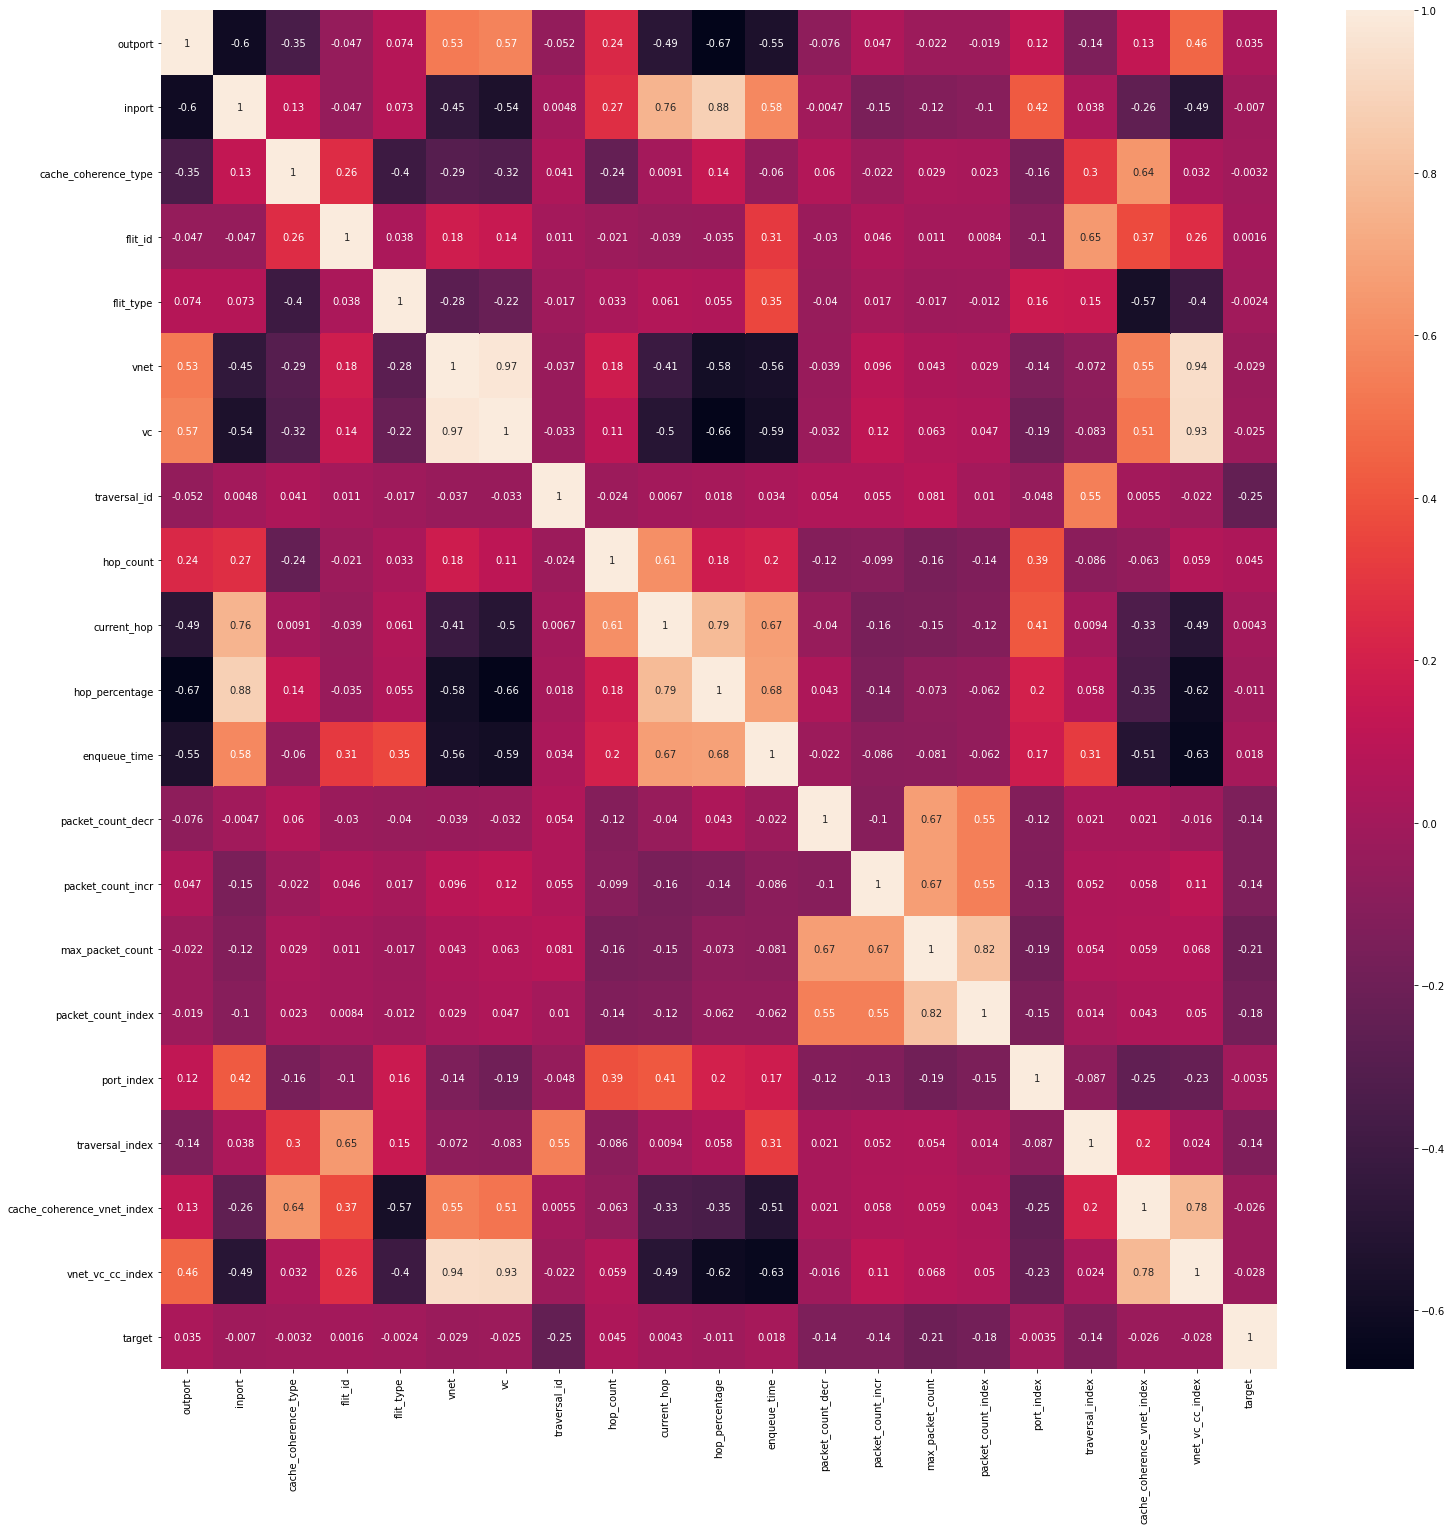

In [23]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [25]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'vnet']

In [0]:
#df = df.drop(columns=[''])

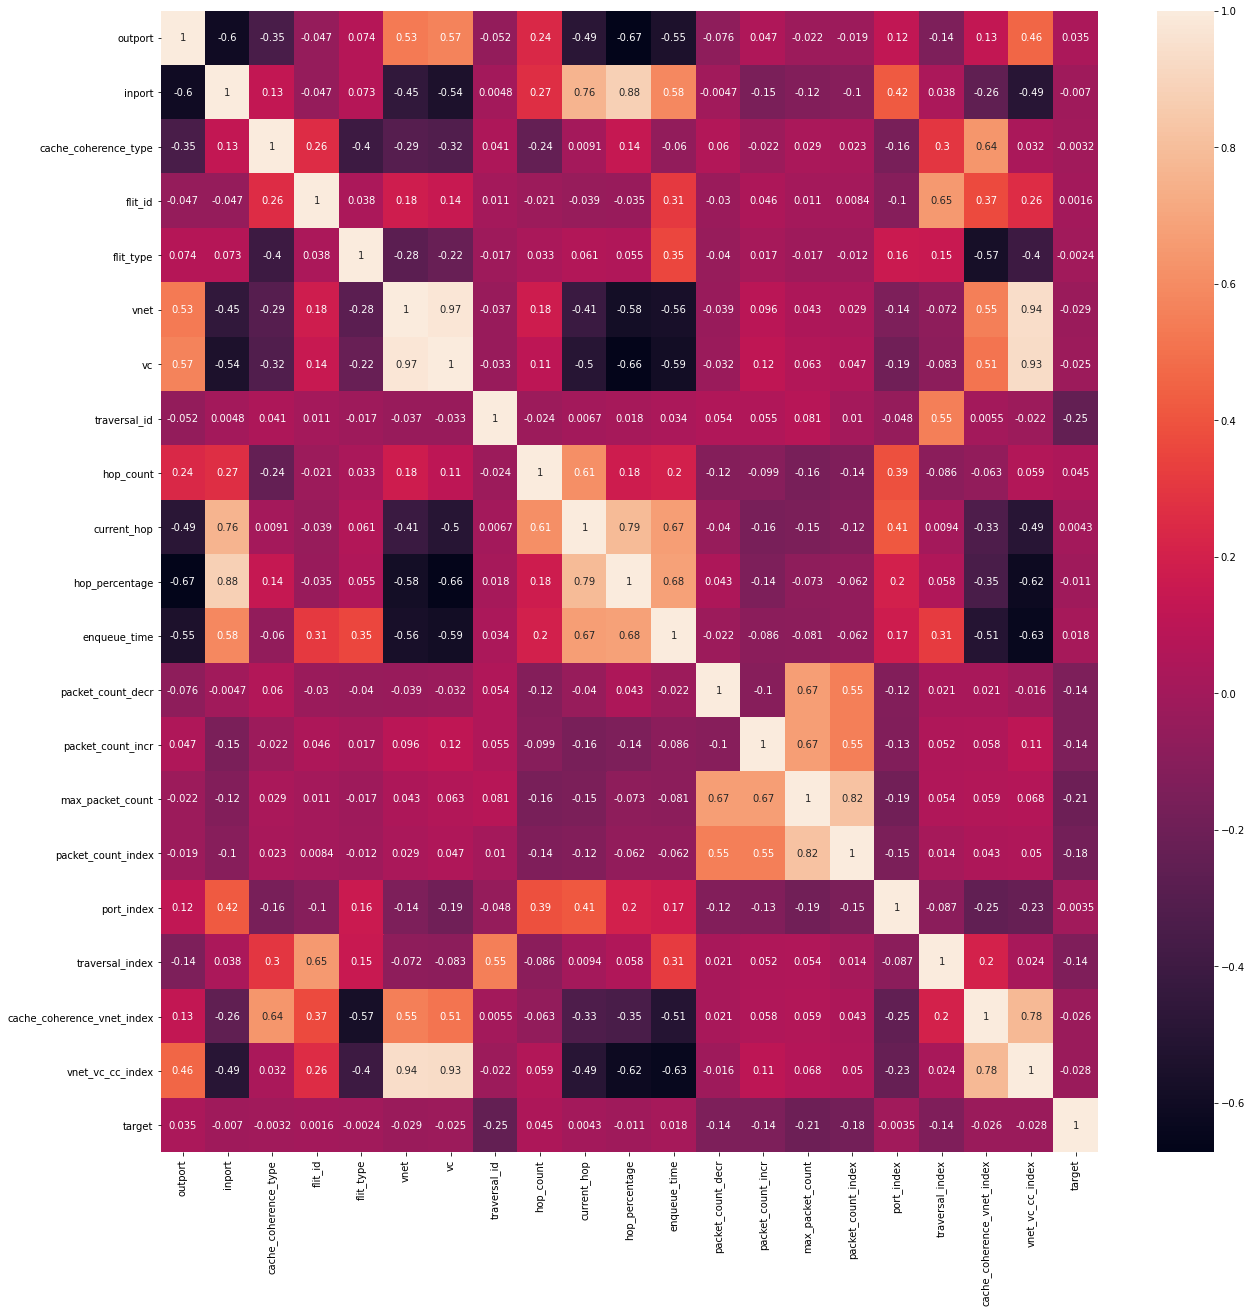

In [27]:
plt.figure(figsize=(21,21))
sns.heatmap(df.corr(), annot = True)
plt.show()

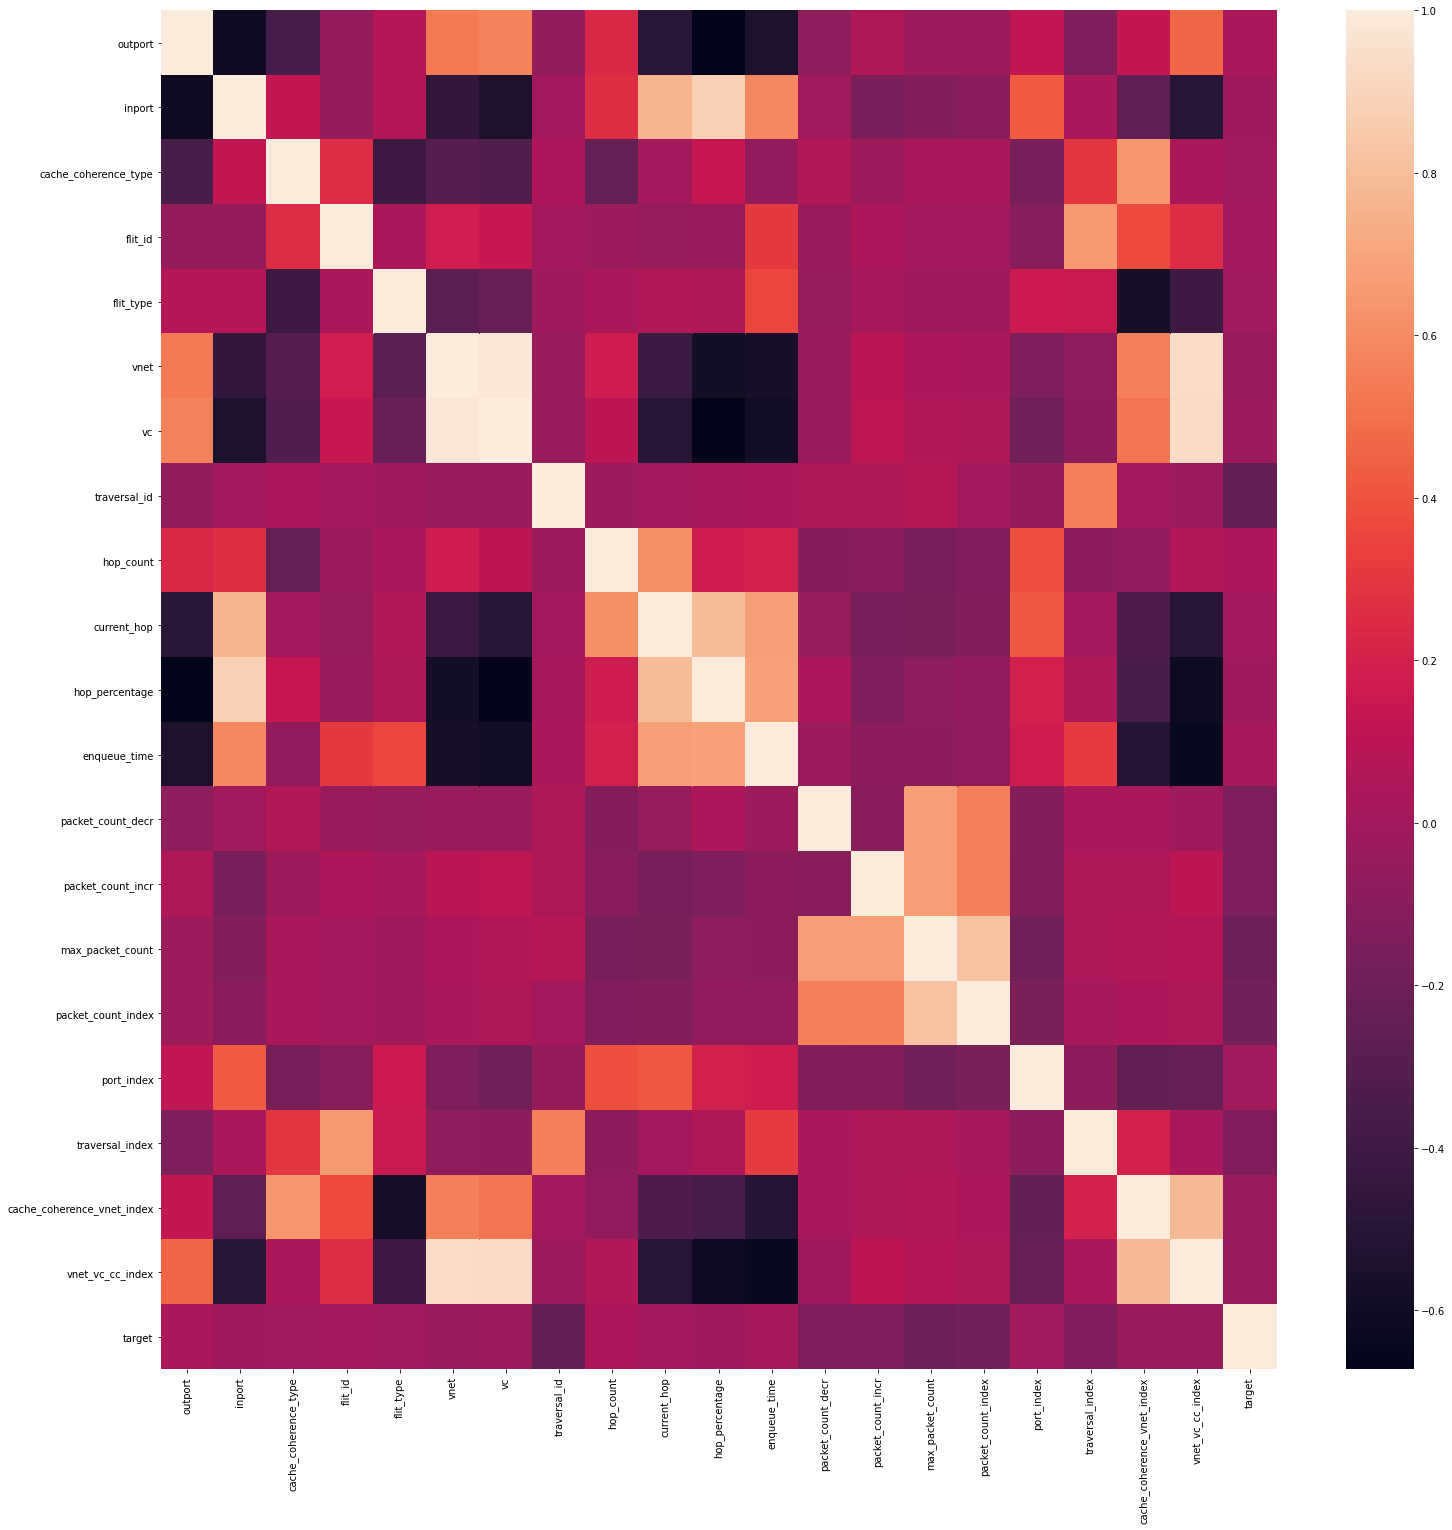

In [28]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [30]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index
0,0.00,0.25,0.0,0.00,1.000000,0.0,0.000000,0.000066,0.166667,0.25,1.0,0.058824,0.607955,0.000000,0.607955,0.013510,0.0,0.000003,0.000000,0.000000
1,0.00,1.00,0.0,0.00,1.000000,0.0,0.000000,0.000066,0.166667,0.25,1.0,0.058824,0.556818,0.000000,0.556818,0.012374,0.0,0.000003,0.000000,0.000000
2,0.00,1.00,0.0,0.00,1.000000,0.0,0.000000,0.000033,0.166667,0.25,1.0,0.058824,0.607955,0.000000,0.607955,0.013510,0.0,0.000001,0.000000,0.000000
3,0.00,0.25,0.0,0.00,1.000000,0.0,0.000000,0.000033,0.166667,0.25,1.0,0.058824,0.659091,0.000000,0.659091,0.014646,0.0,0.000001,0.000000,0.000000
4,0.00,0.25,0.0,0.00,1.000000,0.0,0.000000,0.000066,0.166667,0.25,1.0,0.058824,0.602273,0.000000,0.602273,0.013384,0.0,0.000003,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701657,0.25,0.00,0.5,0.00,0.000000,1.0,0.909091,1.000000,0.333333,0.00,0.0,0.014706,0.022727,0.210227,0.232955,0.023864,0.0,0.044445,0.944444,0.946381
701658,0.25,0.00,0.5,0.25,0.333333,1.0,0.909091,1.000000,0.333333,0.00,0.0,0.029412,0.017045,0.215909,0.232955,0.019571,0.0,0.177782,0.944444,0.946381
701659,0.25,0.00,0.5,0.50,0.333333,1.0,0.909091,1.000000,0.333333,0.00,0.0,0.044118,0.011364,0.221591,0.232955,0.015025,0.0,0.266674,0.944444,0.946381
701660,0.25,0.00,0.5,0.75,0.333333,1.0,0.909091,1.000000,0.333333,0.00,0.0,0.058824,0.005682,0.227273,0.232955,0.010227,0.0,0.355566,0.944444,0.946381


In [31]:
train_X[train_X.duplicated()].shape

(4367, 20)

In [32]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 20)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index
0,0.00,0.25,0.000000,0.00,1.000000,0.0,0.000000,0.000067,0.333333,0.4,1.0,0.114286,0.650307,0.000000,0.650307,0.015577,0.0,0.000003,0.000000,0.000000
1,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.666667,0.8,1.0,0.228571,0.644172,0.006135,0.650307,0.031007,0.0,0.000000,0.000000,0.000000
2,0.00,0.25,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.833333,1.0,1.0,0.285714,0.638037,0.012270,0.650307,0.046143,0.0,0.000001,0.000000,0.000000
3,0.25,0.00,0.500000,0.00,0.000000,1.0,0.727273,0.000067,0.333333,0.0,0.0,0.000000,0.631902,0.018405,0.650307,0.060985,0.0,0.000003,0.944444,0.839142
4,0.25,0.00,0.500000,0.25,0.333333,1.0,0.727273,0.000067,0.333333,0.0,0.0,0.014286,0.625767,0.024540,0.650307,0.075533,0.0,0.000016,0.944444,0.839142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66799,0.25,0.00,0.500000,0.25,0.333333,1.0,0.727273,1.000000,0.333333,0.0,0.0,0.014286,0.024540,0.226994,0.251534,0.027774,0.0,0.177782,0.944444,0.839142
66800,0.25,0.00,0.500000,0.50,0.333333,1.0,0.727273,1.000000,0.333333,0.0,0.0,0.028571,0.018405,0.233129,0.251534,0.022777,0.0,0.266674,0.944444,0.839142
66801,0.25,0.00,0.500000,0.75,0.333333,1.0,0.727273,1.000000,0.333333,0.0,0.0,0.042857,0.012270,0.239264,0.251534,0.017487,0.0,0.355566,0.944444,0.839142
66802,1.00,0.00,0.333333,0.00,1.000000,0.0,0.090909,1.000000,0.166667,0.0,0.0,0.057143,0.006135,0.245399,0.251534,0.011903,0.0,0.133336,0.333333,0.168901


In [33]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 20)


In [34]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 20)


In [35]:
test_X3 = df16.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df16['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 20)


In [36]:
test_X4 = df17.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df17['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 20)


In [37]:
test_X5 = df18.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df18['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)

(0, 20)


In [38]:
test_X6 = df19.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df19['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)

(0, 20)


In [39]:
test_X7 = df20.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y7 = df20['target']
x = test_X7.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X7.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X7 = pd.DataFrame(x_scaled)
test_X7.columns = columns
print(test_X7[test_X7.duplicated()].shape)

(0, 20)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

Labels

1.   0 -  malicious
2.   1 -  good



In [41]:
train_Y = df['target']
train_Y.value_counts()

0    532675
1    168987
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
7                 traversal_id  5948.863514
14            max_packet_count  2762.773703
15          packet_count_index  2450.751159
17             traversal_index  1936.360601
12           packet_count_decr  1384.933817
13           packet_count_incr  1377.845896
5                         vnet   301.521704
0                      outport   296.652732
8                    hop_count   161.763170
6                           vc   158.219720
19            vnet_vc_cc_index    84.204114
18  cache_coherence_vnet_index    36.111189
11                enqueue_time    28.626641
10              hop_percentage    25.715016
1                       inport     9.081001
9                  current_hop     3.732376
16                  port_index     0.784756


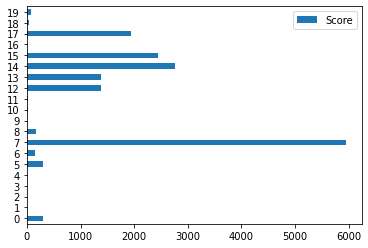

In [44]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [46]:
dt = DecisionTreeClassifier(max_depth=20,max_features=20,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r7.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [49]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 95.95816357252164
Test Prediction Score 95.36032152095373


In [50]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X7)
dt_score_test = accuracy_score(test_Y7,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 88.38093527333693
Test Prediction Score 87.64012525351957
Test Prediction Score 88.02800466744458
Test Prediction Score 87.35340671990791
Test Prediction Score 87.3041851765256
Test Prediction Score 88.1346011850091
Test Prediction Score 86.83207466514676
Test Prediction Score 87.97164098455347


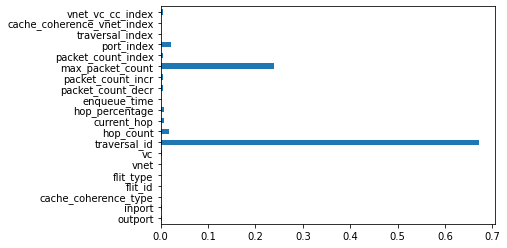

In [51]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

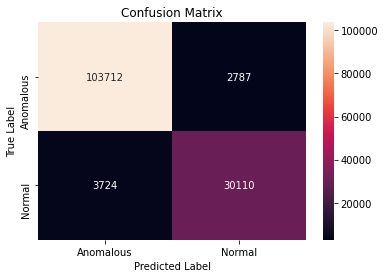

In [52]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [53]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    106499
           1       0.92      0.89      0.90     33834

    accuracy                           0.95    140333
   macro avg       0.94      0.93      0.94    140333
weighted avg       0.95      0.95      0.95    140333



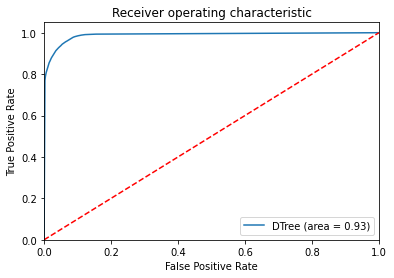

In [54]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [56]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r7.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [59]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.97862216276016
Test Prediction Score 99.67434601982428


In [60]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X7)
xgbc_score_test = accuracy_score(test_Y7,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 89.50661637027723
Test Prediction Score 91.33323715854415
Test Prediction Score 89.3082180363394
Test Prediction Score 90.62882221742571
Test Prediction Score 89.52202812385183
Test Prediction Score 91.33034379671152
Test Prediction Score 88.63636363636364
Test Prediction Score 92.37921332612868


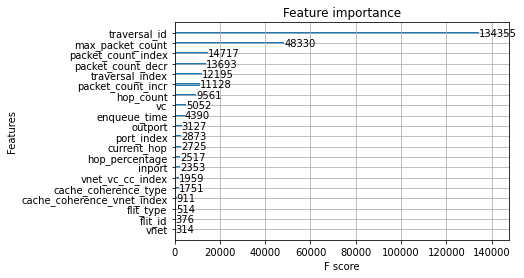

In [61]:
plot_importance(xgbc)
plt.show()

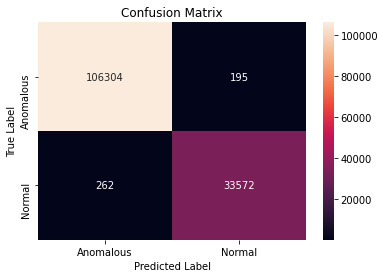

In [62]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [63]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    106499
           1       0.99      0.99      0.99     33834

    accuracy                           1.00    140333
   macro avg       1.00      1.00      1.00    140333
weighted avg       1.00      1.00      1.00    140333



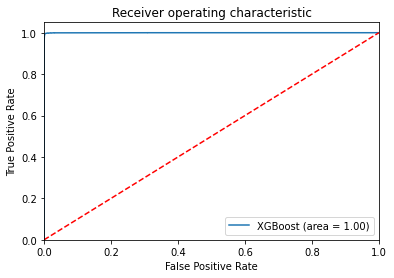

In [64]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()